## LDA document structure ##

## Importing the required packages ##

In [1]:
import pandas as pd
import pathlib
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
from nltk.tokenize import word_tokenize
import os 
import uuid
import textract
import glob

In [2]:
import pandas as pd
import pathlib
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
from nltk.tokenize import word_tokenize
import os 
import uuid
import textract
import glob

In [5]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

# hide warnings
import warnings
warnings.filterwarnings('ignore')


# set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel

In [7]:
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [6]:
!pip install pyLDAvis

  Using cached pyLDAvis-3.3.1-py2.py3-none-any.whl
  Using cached sklearn-0.0.post1.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached future-0.18.2-py3-none-any.whl
  Using cached numexpr-2.8.4-cp37-cp37m-win_amd64.whl (92 kB)
  Using cached pandas-1.3.5-cp37-cp37m-win_amd64.whl (10.0 MB)


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\ju486wk\\anaconda2\\envs\\py37_test\\lib\\site-packages\\six-1.16.0.dist-info\\METADATA'



In [8]:
# Plotting tools
#import pyLDAvis.gensim_models
import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'pyLDAvis'

In [9]:
print(os.getcwd())

C:\Users\JU486WK\OneDrive - EY\Desktop\Topic Modelling_POC


In [10]:
import docx2txt

## Reading the files ##

In [11]:
# Opening JSON file  and reading data
my_text = docx2txt. process('C:/Users/JU486WK/OneDrive - EY/Desktop/Topic Modelling_POC/dbd5bc22-276c-458d-975b-8aa8e3479e7c.docx','r') 
#returns JSON object as  
# a dictionary 
print(my_text)

0:0:0.0 --> 0:0:1.220
Sundaresan M R
Clarifying questions.

0:0:6.730 --> 0:0:7.530
Chanakya Sharma
I think we're going.

0:0:9.260 --> 0:0:9.790
Sanal K Nair
Yeah.

0:0:5.980 --> 0:0:9.990
Subish Ram
No, I think they're good. So you have a questionnaire or something, or you're gonna go.

0:0:9.590 --> 0:0:12.120
Tanya N Cardoso
Yes, yes, yes, so.

0:0:11.260 --> 0:0:12.240
Sundaresan M R
To partner with you.

0:0:13.180 --> 0:0:21.330
Tanya N Cardoso
Thank you Sunderland. Thanks Sobis Chanakyan channel for joining today. So that has set the context this.

0:0:22.530 --> 0:0:51.940
Tanya N Cardoso
Kind of a format will be run twice a year with our key stakeholders as nominated by the service functions to get a sense of a how we are doing SGD S what are the priorities and how we can partner so this entire conversation is structured around six questions, so 45 minutes for six questions at the end of the session. Do give us feedback on the number of questions and.

0:0:52.20 --> 0:1:15.70

In [12]:
# Convert string to Dataframe
data = my_text
df = pd.DataFrame([x.split(';') for x in data.split('\n')])
df.columns = ['Text']

In [13]:
# Identify blank rows and drop
index_names = df[df['Text'] == ''].index
df.drop(index_names, inplace = True)

In [14]:
df[1:50]

,Text
1,Sundaresan M R
2,Clarifying questions.
4,0:0:6.730 --> 0:0:7.530
5,Chanakya Sharma
6,I think we're going.
8,0:0:9.260 --> 0:0:9.790
9,Sanal K Nair
10,Yeah.
12,0:0:5.980 --> 0:0:9.990
13,Subish Ram


## Stopwrds treatment ##

In [15]:
# NLTK Stop words

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','a','about', 'above', 'across'])

In [16]:
st1= ['after', 'afterwards','again','against', 'all', 'almost','alone','along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides',
           'between',
           'beyond',
           'bill',
           'both',
           'bottom',
           'but',
           'by',
           'call',
           'can',
           'cannot',
           'cant',
           'co',
           'con',
           'could',
           'couldnt',
           'cry',
           'de',
           'describe',
           'detail',
           'do',
           'done',
           'down',
           'due',
           'during',
           'each',
           'eg',
           'eight',
           'either',
           'eleven',
           'else',
           'elsewhere',
           'empty',
           'enough',
           'etc',
           'even',
           'ever',
           'every',
           'everyone',
           'everything',
           'everywhere',
           'except',
           'few',
           'fifteen',
           'fifty',
           'fill',
           'find',
           'fire',
           'first',
           'five',
           'for',
           'former',
           'formerly',
           'forty',
           'found',
           'four',
           'from',
           'front',
           'full',
           'further',
           'get',
           'give',
           'go',
           'had',
           'has',
           'hasnt',
           'have',
           'he',
           'hence',
           'her',
           'here',
           'hereafter',
           'hereby',
           'herein',
           'hereupon',
           'hers',
           'herself',
           'him',
           'himself',
           'his',
           'how',
           'however',
           'hundred',
           'i',
           'ie',
           'if',
           'in',
           'inc',
           'indeed',
           'interest',
           'into',
           'is',
           'it',
           'its',
           'itself',
           'keep',
           'last',
           'latter',
           'latterly',
           'least',
           'less',
           'ltd',
           'made',
           'many',
           'may',
           'me',
           'meanwhile',
           'might',
           'mill',
           'mine',
           'more',
           'moreover',
           'most',
           'mostly',
           'move',
           'much',
           'must',
           'my',
           'myself',
           'name',
           'namely',
           'neither',
           'never',
           'nevertheless',
           'next',
           'nine',
           'no',
           'nobody',
           'none',
           'noone',
           'nor',
           'not',
           'nothing',
           'now',
           'nowhere',
           'of',
           'off',
           'often',
           'on',
           'once',
           'one',
           'only',
           'onto',
           'or',
           'other',
           'others',
           'otherwise',
           'our',
           'ours',
           'ourselves',
           'out',
           'over',
           'own',
           'part',
           'per',
           'perhaps',
           'please',
           'put',
           'rather',
           're',
           'same',
           'see',
           'seem',
           'seemed',
           'seeming',
           'seems',
           'serious',
           'several',
           'she',
           'should',
           'show',
           'side',
           'since',
           'sincere',
           'six',
           'sixty',
           'so',
           'some',
           'somehow',
           'someone',
           'something',
           'sometime',
           'sometimes',
           'somewhere',
           'still',
           'such',
           'system',
           'take',
           'ten',
           'than',
           'that',
           'the',
           'their',
           'them',
           'themselves',
           'then',
           'thence',
           'there',
           'thereafter',
           'thereby',
           'therefore',
           'therein',
           'thereupon',
           'these',
           'they',
           'thick',
           'thin',
           'third',
           'this',
           'those',
           'though',
           'three',
           'through',
           'throughout',
           'thru',
           'thus',
           'to',
           'together',
           'too',
           'top',
           'toward',
           'towards',
           'twelve',
           'twenty',
           'two',
           'un',
           'under',
           'until',
           'up',
           'upon',
           'us',
           'very',
           'via',
           'was',
           'we',
           'well',
           'were',
           'what',
           'whatever',
           'when',
           'whence',
           'whenever',
           'where',
           'whereafter',
           'whereas',
           'whereby',
           'wherein',
           'whereupon',
           'wherever',
           'whether',
           'which',
           'while',
           'whither',
           'who',
           'whoever',
           'whole',
           'whom',
           'whose',
           'why',
           'will',
           'with',
           'within',
           'without',
           'would',
           'yet',
           'you',
           'your',
           'yours',
           'yourself',
           'yourselves']

In [17]:
stop_words.extend(st1)

In [18]:
# Drop rows with time stamp followed by names
m = df['Text'].astype(str).str.startswith('0')
df = df[~m & ~m.shift(fill_value=False)]
#df = df[~df['Text'].astype(str).str.startswith('[6')]
#df = df[~df['Text'].astype(str).str.startswith('[7')]
df = df[~df['Text'].astype(str).str.startswith('[18')]
df = df[~df['Text'].astype(str).str.startswith('[19')]
m = df['Text'].astype(str).str.startswith('1')
df = df[~m & ~m.shift(fill_value=False)]
#df= df["Text"].str.replace(r's*https?://S+(s+|$)','').str.strip()
df["Text"] = df["Text"].str.replace(r'\s*https?://\S+(\s+|$)', ' ').str.strip()

In [19]:
df

,Text
2,Clarifying questions.
6,I think we're going.
10,Yeah.
14,"No, I think they're good. So you have a questi..."
18,"Yes, yes, yes, so."
22,To partner with you.
26,Thank you Sunderland. Thanks Sobis Chanakyan c...
30,Kind of a format will be run twice a year with...
34,"How you see it playing out today, there are th..."
38,"Ohh, service functions. The first set of quest..."


In [20]:
# Convert to list
df_new = df.Text.values.tolist()

df_new = [re.sub('\S*@\S*\s?', '', sent) for sent in df_new]

# Remove new line characters
df_new= [re.sub('\s+', ' ', sent) for sent in df_new]

# Remove distracting single quotes
df_new = [re.sub("\'", "", sent) for sent in df_new]

pprint(df_new[:1])

['Clarifying questions.']


In [21]:
df_new = [re.sub("-", " ", sent) for sent in df_new]
df_new = [re.sub(":", "", sent) for sent in df_new]

In [22]:
## All punctuatins need to be removed ##
df_new

['Clarifying questions.',
 'I think were going.',
 'Yeah.',
 'No, I think theyre good. So you have a questionnaire or something, or youre gonna go.',
 'Yes, yes, yes, so.',
 'To partner with you.',
 'Thank you Sunderland. Thanks Sobis Chanakyan channel for joining today. So that has set the context this.',
 'Kind of a format will be run twice a year with our key stakeholders as nominated by the service functions to get a sense of a how we are doing SGD S what are the priorities and how we can partner so this entire conversation is structured around six questions, so 45 minutes for six questions at the end of the session. Do give us feedback on the number of questions and.',
 'How you see it playing out today, there are three of you. In reality, as we go down service functions, the number of people participating could vary, right? And some it could be just a couple, some could be a much larger group. So do keep that in mind as you provide feedback as well. I think end of the session, bu

In [23]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

df_words = list(sent_to_words(df_new))

In [24]:
df_words

[['clarifying', 'questions'],
 ['think', 'were', 'going'],
 ['yeah'],
 ['no',
  'think',
  'theyre',
  'good',
  'so',
  'you',
  'have',
  'questionnaire',
  'or',
  'something',
  'or',
  'youre',
  'gonna',
  'go'],
 ['yes', 'yes', 'yes', 'so'],
 ['to', 'partner', 'with', 'you'],
 ['thank',
  'you',
  'sunderland',
  'thanks',
  'sobis',
  'chanakyan',
  'channel',
  'for',
  'joining',
  'today',
  'so',
  'that',
  'has',
  'set',
  'the',
  'context',
  'this'],
 ['kind',
  'of',
  'format',
  'will',
  'be',
  'run',
  'twice',
  'year',
  'with',
  'our',
  'key',
  'stakeholders',
  'as',
  'nominated',
  'by',
  'the',
  'service',
  'functions',
  'to',
  'get',
  'sense',
  'of',
  'how',
  'we',
  'are',
  'doing',
  'sgd',
  'what',
  'are',
  'the',
  'priorities',
  'and',
  'how',
  'we',
  'can',
  'partner',
  'so',
  'this',
  'entire',
  'conversation',
  'is',
  'structured',
  'around',
  'six',
  'questions',
  'so',
  'minutes',
  'for',
  'six',
  'questions',

## Ngram models ##

In [25]:
# Build the bigram and trigram models

bigram = gensim.models.Phrases(df_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[df_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [26]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [27]:
## Applying the functions to our dataset ##

In [28]:
# Remove Stop Words

data_words_nostops = remove_stopwords(df_words)

# Form Bigrams

data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [44]:
data_lemmatized

[['clarify', 'question'],
 ['think', 'go'],
 [],
 ['think', 'be', 'good', 'questionnaire', 'be', 'go'],
 [],
 ['partner'],
 ['thank', 'join', 'today', 'set', 'context'],
 ['kind',
  'format',
  'run',
  'twice',
  'year',
  'key',
  'stakeholder',
  'nominate',
  'service',
  'function',
  'sense',
  'sgd',
  'priority',
  'partner',
  'entire',
  'conversation',
  'structure',
  'question',
  'minute',
  'question',
  'end',
  'session',
  'feedback',
  'number',
  'question'],
 ['play',
  'today',
  'reality',
  'service',
  'function',
  'number',
  'people',
  'participate',
  'vary',
  'right',
  'couple',
  'large',
  'group',
  'mind',
  'provide',
  'feedback',
  'think',
  'end',
  'session',
  'come',
  'question',
  'ask'],
 ['function', 'set', 'question'],
 ['align',
  'strength',
  'impact',
  'etcetera',
  'let',
  'start',
  'question',
  'question',
  'view',
  'big',
  'strength',
  'gds'],
 ['start'],
 ['come'],
 ['feel',
  'free',
  'answer',
  'sundar',
  'mention',

In [29]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [45]:
id2word

In [30]:
corpus

[[(0, 1), (1, 1)],
 [(2, 1), (3, 1)],
 [],
 [(2, 1), (3, 1), (4, 2), (5, 1), (6, 1)],
 [],
 [(7, 1)],
 [(8, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(1, 3),
  (7, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1)],
 [(1, 1),
  (3, 1),
  (12, 1),
  (14, 1),
  (16, 1),
  (18, 1),
  (23, 1),
  (27, 1),
  (28, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1)],
 [(1, 1), (10, 1), (18, 1)],
 [(1, 2),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 2),
  (55, 1)],
 [(53, 1)],
 [(35, 1)],
 [(1, 1),
  (18, 1),
  (27, 1),
  (35, 1),
  (39, 1),
  (43, 1),
  (45, 1),
  (54, 1),
  (56, 3),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),

In [31]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[1:100]]

[[('go', 1), ('think', 1)],
 [],
 [('go', 1), ('think', 1), ('be', 2), ('good', 1), ('questionnaire', 1)],
 [],
 [('partner', 1)],
 [('context', 1), ('join', 1), ('set', 1), ('thank', 1), ('today', 1)],
 [('question', 3),
  ('partner', 1),
  ('conversation', 1),
  ('end', 1),
  ('entire', 1),
  ('feedback', 1),
  ('format', 1),
  ('function', 1),
  ('key', 1),
  ('kind', 1),
  ('minute', 1),
  ('nominate', 1),
  ('number', 1),
  ('priority', 1),
  ('run', 1),
  ('sense', 1),
  ('service', 1),
  ('session', 1),
  ('sgd', 1),
  ('stakeholder', 1),
  ('structure', 1),
  ('twice', 1),
  ('year', 1)],
 [('question', 1),
  ('think', 1),
  ('today', 1),
  ('end', 1),
  ('feedback', 1),
  ('function', 1),
  ('number', 1),
  ('service', 1),
  ('session', 1),
  ('ask', 1),
  ('come', 1),
  ('couple', 1),
  ('group', 1),
  ('large', 1),
  ('mind', 1),
  ('participate', 1),
  ('people', 1),
  ('play', 1),
  ('provide', 1),
  ('reality', 1),
  ('right', 1),
  ('vary', 1)],
 [('question', 1), ('set'

## Building the LDA model ##

In [32]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

## Lets Build the model ##

In [33]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.053*"know" + 0.034*"be" + 0.033*"work" + 0.022*"say" + 0.021*"go" + '
  '0.021*"good" + 0.020*"multiple" + 0.020*"thing" + 0.019*"bring" + '
  '0.015*"think"'),
 (1,
  '0.040*"right" + 0.032*"need" + 0.031*"question" + 0.031*"answer" + '
  '0.025*"know" + 0.022*"s" + 0.022*"feedback" + 0.022*"think" + '
  '0.020*"experience" + 0.019*"come"'),
 (2,
  '0.033*"sure" + 0.033*"know" + 0.022*"stakeholder" + 0.021*"team" + '
  '0.020*"people" + 0.020*"ask" + 0.019*"think" + 0.019*"get" + 0.017*"feel" + '
  '0.017*"look"'),
 (3,
  '0.068*"question" + 0.045*"s" + 0.025*"time" + 0.023*"priority" + '
  '0.021*"think" + 0.020*"maybe" + 0.017*"right" + 0.013*"conversation" + '
  '0.013*"value" + 0.012*"stakeholder"'),
 (4,
  '0.059*"think" + 0.038*"know" + 0.024*"service" + 0.021*"function" + '
  '0.020*"say" + 0.020*"different" + 0.016*"year" + 0.016*"group" + '
  '0.013*"line" + 0.012*"right"')]


## Accuracy of the model ##

1) Perplexity - Is a statistical measure of how well a probability model predicts a sample. As applied to LDA, for a given value of k, you estimate the LDA model. Then given the theoretical word distributions represented by the topics, compare that to the actual topic mixtures, or distribution of words in your documents. - Lower the better.
2) Coherence Score - Is defined as the average / median of the pairwise word-similarity scores of the words in the topic - Higher the better.

In [35]:
#x = data['Message_Processed'].values.tolist()

#docs = list(sent_to_words(x))

In [36]:
'''
x = df['Text'].values.tolist()

docs = list(sent_to_words(x))
'''

In [36]:
x = df_words

docs = list(sent_to_words(x))

In [39]:
docs

[['clarifying', 'questions'],
 ['think', 'were', 'going'],
 ['yeah'],
 ['no',
  'think',
  'theyre',
  'good',
  'so',
  'you',
  'have',
  'questionnaire',
  'or',
  'something',
  'or',
  'youre',
  'gonna',
  'go'],
 ['yes', 'yes', 'yes', 'so'],
 ['to', 'partner', 'with', 'you'],
 ['thank',
  'you',
  'sunderland',
  'thanks',
  'sobis',
  'chanakyan',
  'channel',
  'for',
  'joining',
  'today',
  'so',
  'that',
  'has',
  'set',
  'the',
  'context',
  'this'],
 ['kind',
  'of',
  'format',
  'will',
  'be',
  'run',
  'twice',
  'year',
  'with',
  'our',
  'key',
  'stakeholders',
  'as',
  'nominated',
  'by',
  'the',
  'service',
  'functions',
  'to',
  'get',
  'sense',
  'of',
  'how',
  'we',
  'are',
  'doing',
  'sgd',
  'what',
  'are',
  'the',
  'priorities',
  'and',
  'how',
  'we',
  'can',
  'partner',
  'so',
  'this',
  'entire',
  'conversation',
  'is',
  'structured',
  'around',
  'six',
  'questions',
  'so',
  'minutes',
  'for',
  'six',
  'questions',

In [41]:
import nltk
from nltk.tokenize import word_tokenize


In [43]:
doc_new = word_tokenize(df_words)

TypeError: expected string or bytes-like object

In [38]:
# Compute Perplexity

print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 

# Compute Coherence Score

coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.28401323954021

Coherence Score:  nan


In [39]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=docs, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [40]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=docs, start=1, limit=6, step=1)

In [41]:
model_list, coherence_values

([<gensim.models.ldamodel.LdaModel at 0x19ab3aeeac8>,
 [nan, nan, nan, nan, nan])

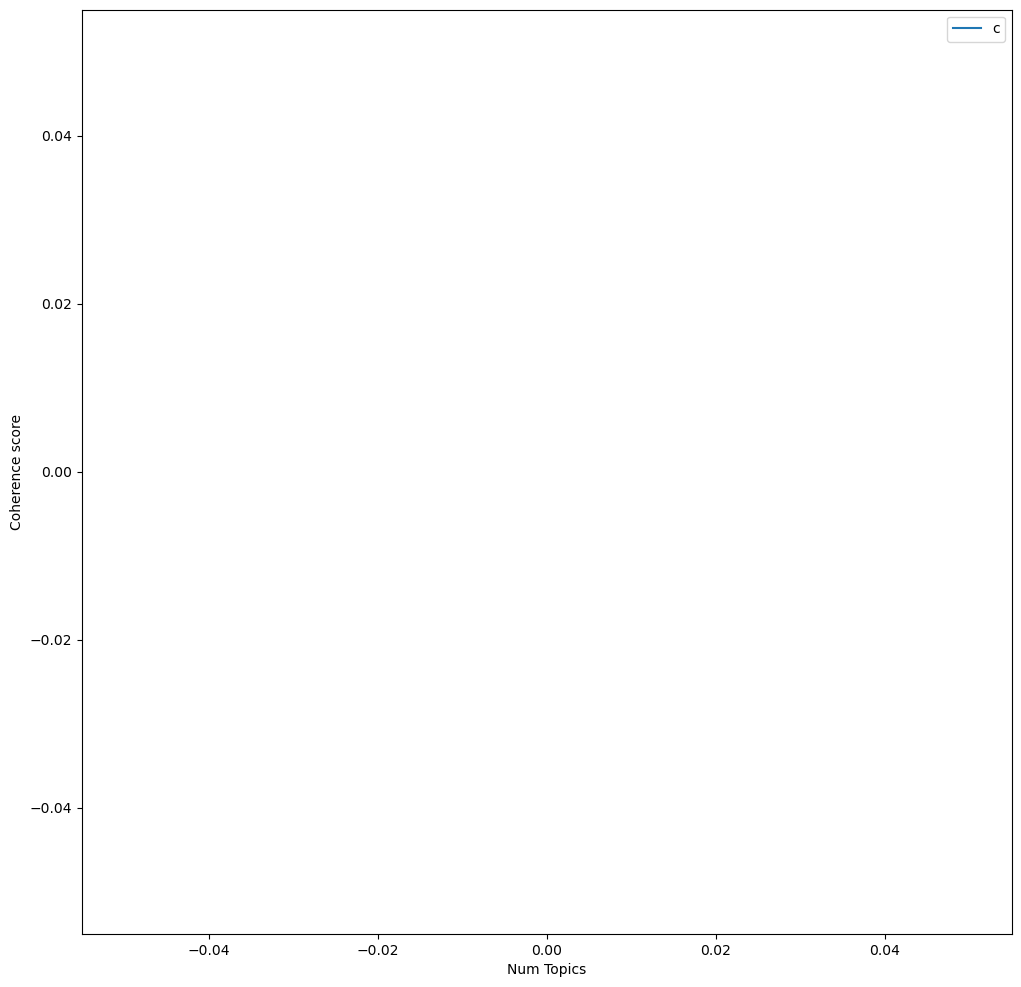

In [42]:
limit=6; start=1; step=1;
x = range(start, limit, step)
plt.figure(figsize=(12,12))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [43]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of nan
Num Topics = 2  has Coherence Value of nan
Num Topics = 3  has Coherence Value of nan
Num Topics = 4  has Coherence Value of nan
Num Topics = 5  has Coherence Value of nan


In [44]:
# Select the model and print the topics

optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.048*"know" + 0.020*"be" + 0.020*"think" + 0.017*"right" + '
  '0.016*"question" + 0.014*"s" + 0.013*"correct" + 0.013*"guess" + '
  '0.012*"service" + 0.011*"point"'),
 (1,
  '0.051*"think" + 0.034*"know" + 0.032*"s" + 0.016*"say" + 0.012*"strength" + '
  '0.011*"thank" + 0.011*"right" + 0.011*"team" + 0.011*"come" + 0.010*"feel"'),
 (2,
  '0.030*"question" + 0.028*"think" + 0.027*"right" + 0.022*"service" + '
  '0.021*"work" + 0.015*"know" + 0.015*"team" + 0.014*"come" + 0.014*"s" + '
  '0.013*"bring"'),
 (3,
  '0.030*"know" + 0.023*"question" + 0.019*"right" + 0.014*"answer" + '
  '0.013*"mean" + 0.013*"hear" + 0.012*"be" + 0.011*"think" + 0.010*"say" + '
  '0.010*"time"')]


In [45]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
   
    sent_topics_df = pd.DataFrame()

   
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # -- dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)
    

df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=docs)


df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']


df_dominant_topic.head(5)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.7453,"question, think, right, service, work, know, t...","[clarifying, questions]"
1,1,1.0,0.7361,"think, know, s, say, strength, thank, right, t...","[think, we, re, going]"
2,2,0.0,0.2500,"know, be, think, right, question, s, correct, ...",[yeah]
3,3,0.0,0.8885,"know, be, think, right, question, s, correct, ...","[no, think, they, re, good, so, you, have, que..."
4,4,0.0,0.2500,"know, be, think, right, question, s, correct, ...","[yes, yes, yes, so]"


## Hierarchial Dirichlet Process ##

## HDP is an extension of LDA, designed to address the case where the number of mixture components (the number of "topics" in document-modeling terms) is not known apriori.

Using LDA for document modeling, one treats each "topic" as a distribution of words in some known vocabulary. For each document a mixture of topics is drawn from a Dirichlet distribution, and then each word in the document is an independent draw from that mixture (that is, selecting a topic and then using it to generate a word).

For HDP (applied to document modeling), one also uses a Dirichlet process to capture the uncertainty in the number of topics. So a common base distribution is selected which represents the countably-infinite set of possible topics for the corpus, and then the finite distribution of topics for each document is sampled from this base distribution.